# Import Library

In [38]:
import pandas as pd
import numpy as np

# Load the dataset

In [39]:

data = pd.read_csv('Coffee_Shop_Sales.csv')

In [40]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# Check data types and make sure they're correct

In [41]:
print(data.dtypes)

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object


# Convert transaction_date and transaction_time to datetime objects

In [42]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'], format='%m/%d/%Y')
data['transaction_time'] = pd.to_datetime(data['transaction_time'], format='%H:%M:%S').dt.time


In [43]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# Check for duplicates and missing values

In [44]:
duplicates = data.duplicated().sum()
missing_values = data.isnull().sum()

print(f"Number of duplicate rows: {duplicates}")
print("Missing values per column:\n", missing_values)

Number of duplicate rows: 0
Missing values per column:
 transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


# Create a revenue column

In [45]:
data['transaction_revenue'] = data['transaction_qty'] * data['unit_price']

# Exploratory Data Analysis (EDA)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales trends over time

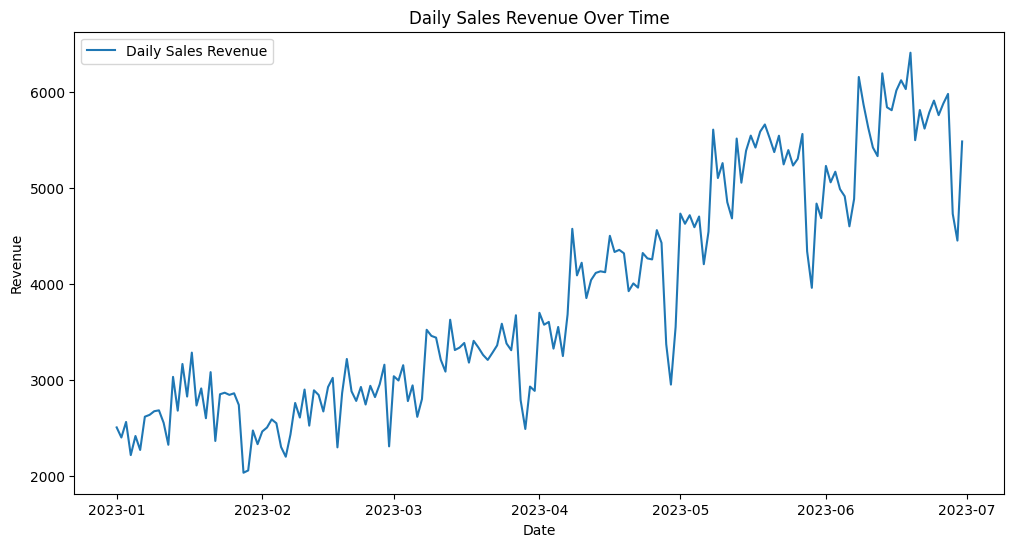

In [47]:
daily_sales = data.groupby('transaction_date')['transaction_revenue'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Daily Sales Revenue Over Time')
plt.legend()
plt.show()


# Product Performance

In [48]:
product_sales = data.groupby(['product_category', 'product_type'])['transaction_revenue'].sum().sort_values(ascending=False)
print("Top-selling products by category and type:\n", product_sales)


Top-selling products by category and type:
 product_category    product_type         
Coffee              Barista Espresso         91406.20
Tea                 Brewed Chai tea          77081.95
Drinking Chocolate  Hot chocolate            72416.00
Coffee              Gourmet brewed coffee    70034.60
Tea                 Brewed Black tea         47932.00
                    Brewed herbal tea        47539.50
Coffee              Premium brewed coffee    38781.15
                    Organic brewed coffee    37746.50
Bakery              Scone                    36866.12
Coffee              Drip coffee              31984.00
Bakery              Pastry                   25655.99
Tea                 Brewed Green tea         23852.50
Bakery              Biscotti                 19793.53
Coffee beans        Premium Beans            14583.50
                    Organic Beans             8509.50
Branded             Housewares                7444.00
Coffee beans        Gourmet Beans             6798

# Store Analysis

In [49]:
store_sales = data.groupby(['store_location', 'store_id'])['transaction_revenue'].sum().sort_values(ascending=False)
print("Top-performing stores:\n", store_sales)


Top-performing stores:
 store_location   store_id
Hell's Kitchen   8           236511.17
Astoria          3           232243.91
Lower Manhattan  5           230057.25
Name: transaction_revenue, dtype: float64


# Time-of-Day Analysis

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19104\2648708192.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette="viridis")


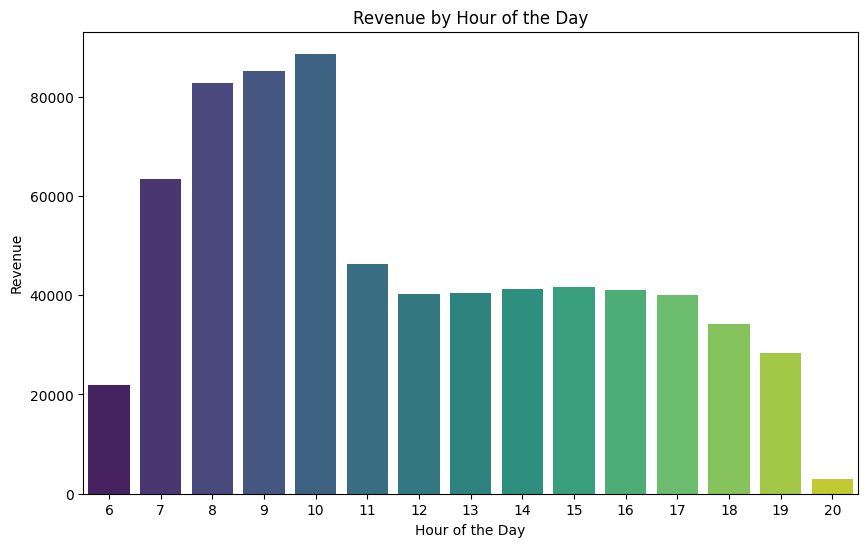

In [50]:
data['transaction_hour'] = pd.to_datetime(data['transaction_time'], format='%H:%M:%S').dt.hour
hourly_sales = data.groupby('transaction_hour')['transaction_revenue'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette="viridis")
plt.xlabel('Hour of the Day')
plt.ylabel('Revenue')
plt.title('Revenue by Hour of the Day')
plt.show()


# Overall Revenue Analysis

In [51]:
total_revenue = data['transaction_revenue'].sum()
print(f"Total revenue for the period: ${total_revenue:.2f}")

Total revenue for the period: $698812.33


# Customer Behavior Analysis

In [52]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['day_of_week'] = data['transaction_date'].dt.day_name()
data['transaction_hour'] = pd.to_datetime(data['transaction_time'], format='%H:%M:%S').dt.hour

### Sales by Day of the Week

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19104\1921968880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='viridis')


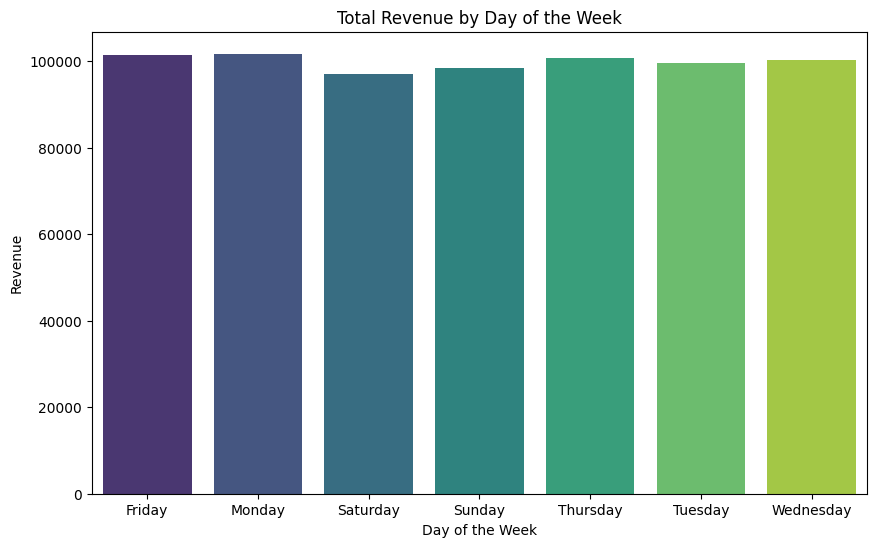

In [53]:
sales_by_day = data.groupby('day_of_week')['transaction_revenue'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='viridis')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.show()

### Sales by Hour of the Day

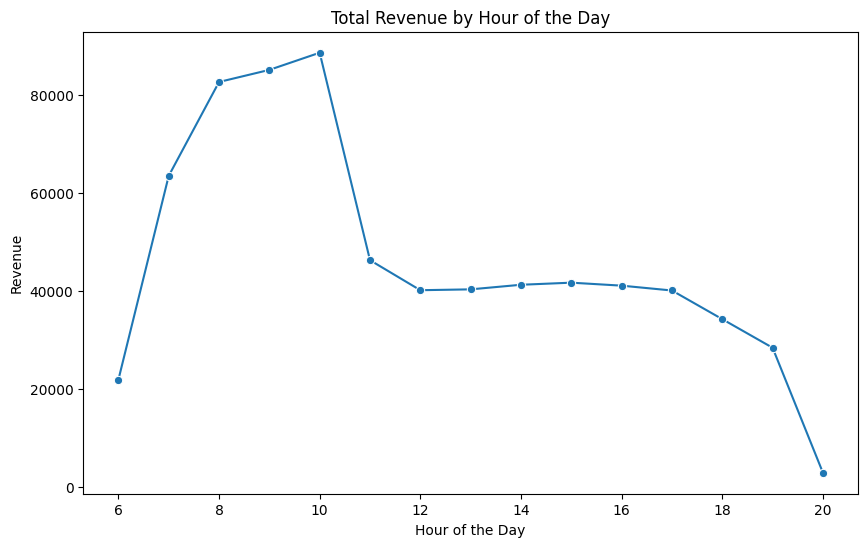

In [54]:
sales_by_hour = data.groupby('transaction_hour')['transaction_revenue'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker='o')
plt.title('Total Revenue by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Revenue')
plt.show()

# Product Performance Analysis

### Total revenue by product category

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19104\3964479473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette="coolwarm")


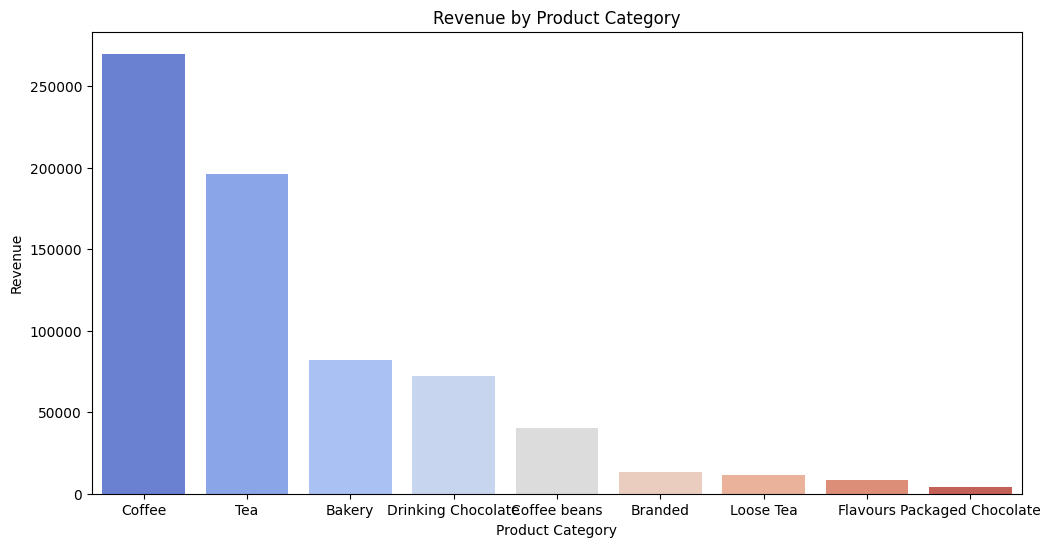

In [55]:
product_sales = data.groupby('product_category')['transaction_revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="coolwarm")
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()

### Detailed analysis of top-performing product types

In [56]:
top_products = data.groupby(['product_category', 'product_type'])['transaction_revenue'].sum().sort_values(ascending=False)
print("Top-performing products:\n", top_products.head(10))

Top-performing products:
 product_category    product_type         
Coffee              Barista Espresso         91406.20
Tea                 Brewed Chai tea          77081.95
Drinking Chocolate  Hot chocolate            72416.00
Coffee              Gourmet brewed coffee    70034.60
Tea                 Brewed Black tea         47932.00
                    Brewed herbal tea        47539.50
Coffee              Premium brewed coffee    38781.15
                    Organic brewed coffee    37746.50
Bakery              Scone                    36866.12
Coffee              Drip coffee              31984.00
Name: transaction_revenue, dtype: float64


# Store Performance Analysis

### Total revenue by store

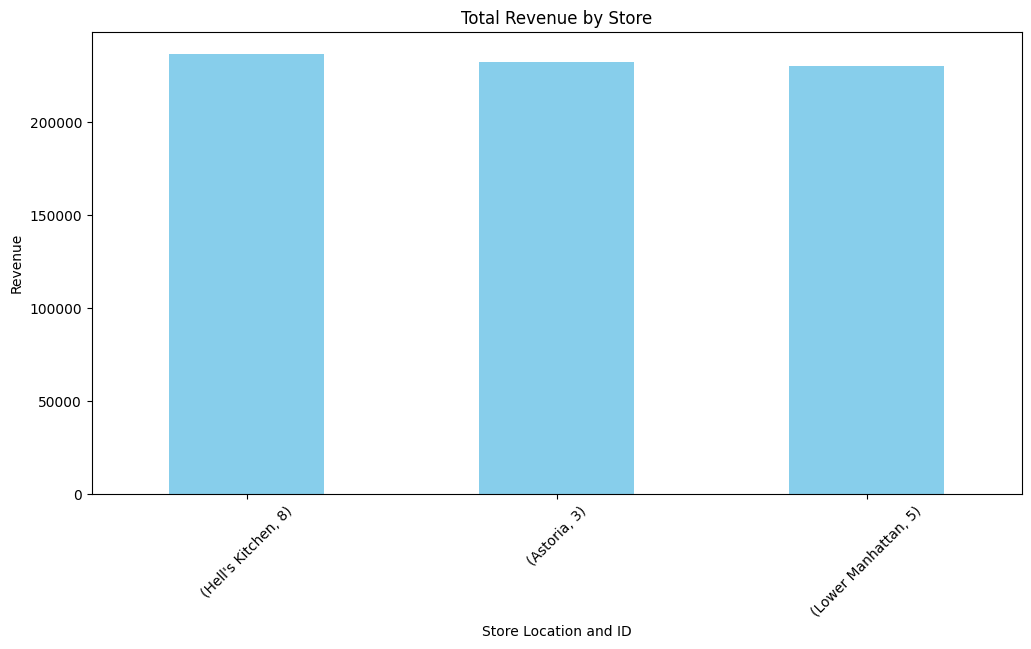

In [57]:
store_revenue = data.groupby(['store_location', 'store_id'])['transaction_revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
store_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Store')
plt.xlabel('Store Location and ID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

### Top-performing stores

In [58]:
print("Top-performing stores:\n", store_revenue.head(5))

Top-performing stores:
 store_location   store_id
Hell's Kitchen   8           236511.17
Astoria          3           232243.91
Lower Manhattan  5           230057.25
Name: transaction_revenue, dtype: float64


# Revenue and Transaction Analysis

### Average revenue per transaction

In [59]:
avg_revenue_per_transaction = data['transaction_revenue'].mean()
print(f"Average revenue per transaction: ${avg_revenue_per_transaction:.2f}")

Average revenue per transaction: $4.69


### Transaction revenue distribution

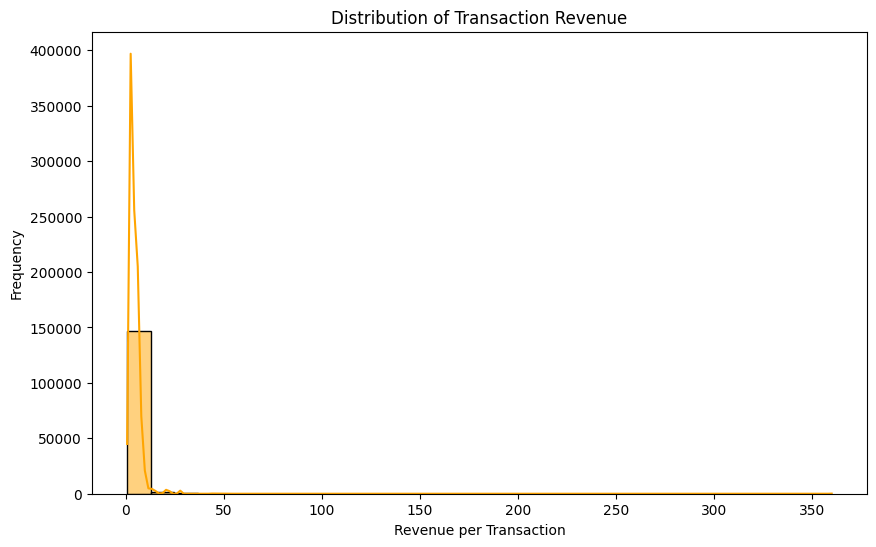

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(data['transaction_revenue'], bins=30, kde=True, color='orange')
plt.title('Distribution of Transaction Revenue')
plt.xlabel('Revenue per Transaction')
plt.ylabel('Frequency')
plt.show()

# Time-Based Trends (Monthly and Quarterly Sales Trends)

### Extracting month and quarter

In [61]:
data['month'] = data['transaction_date'].dt.month
data['quarter'] = data['transaction_date'].dt.quarter

### Monthly revenue trend

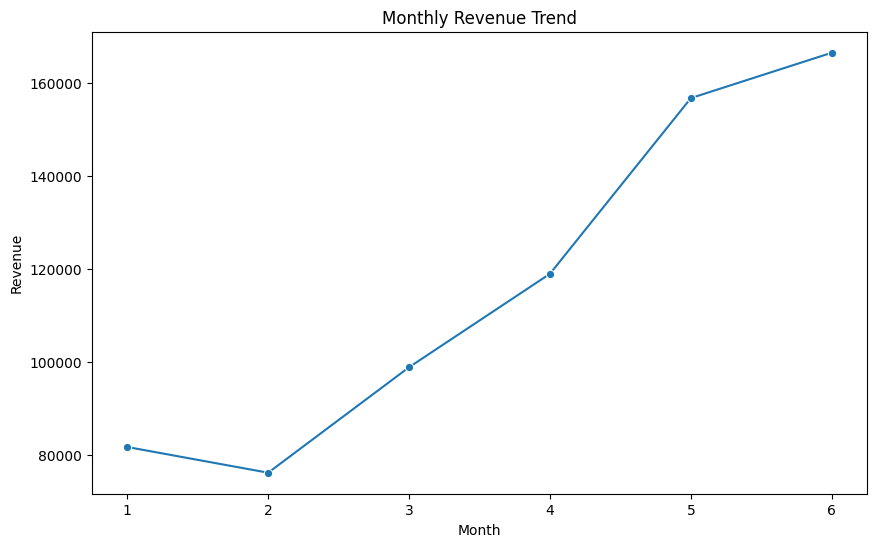

In [62]:
monthly_revenue = data.groupby('month')['transaction_revenue'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

### Quarterly revenue trend

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19104\3254364947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_revenue.index, y=quarterly_revenue.values, palette="Blues")


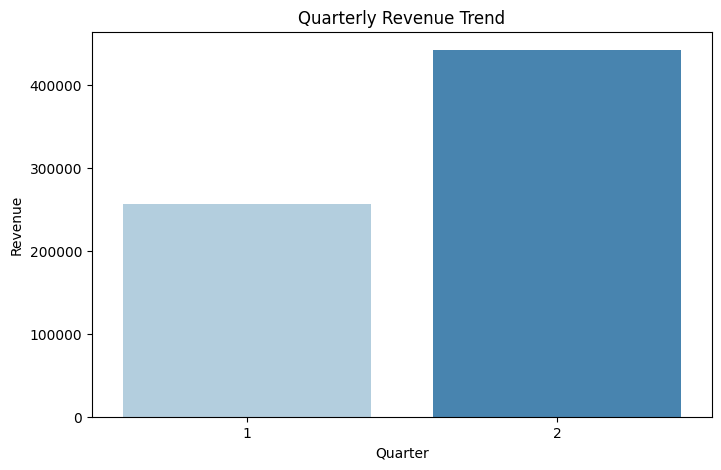

In [63]:
quarterly_revenue = data.groupby('quarter')['transaction_revenue'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=quarterly_revenue.index, y=quarterly_revenue.values, palette="Blues")
plt.title('Quarterly Revenue Trend')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.show()

# Product Detail-Level Analysis

### Revenue by product details

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19104\1731086301.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_details.values, y=top_product_details.index, palette="magma")


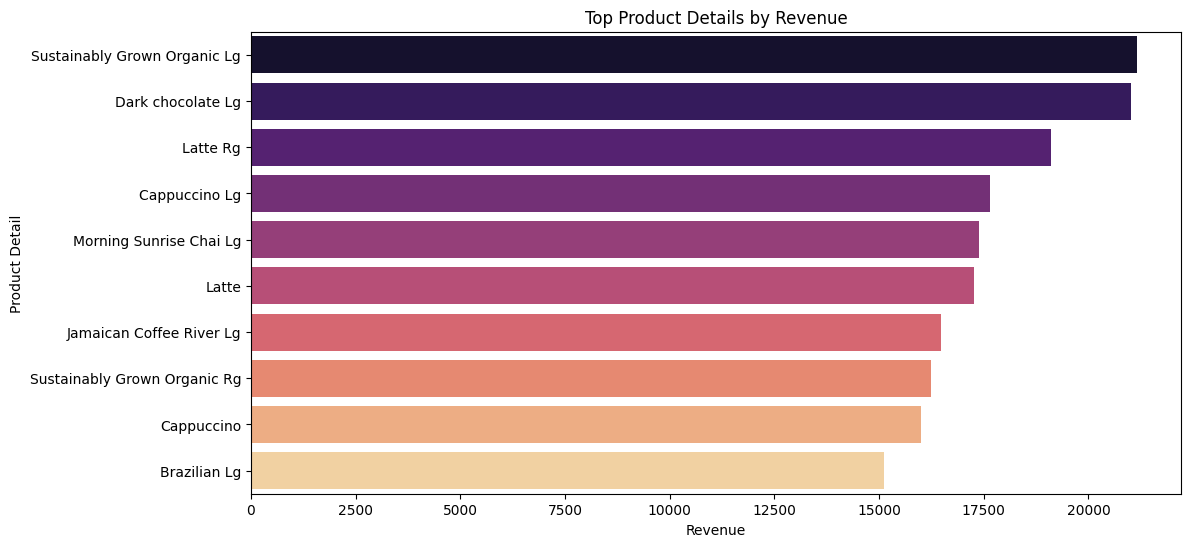

Top product details:
 product_detail
Sustainably Grown Organic Lg    21151.75
Dark chocolate Lg               21006.00
Latte Rg                        19112.25
Cappuccino Lg                   17641.75
Morning Sunrise Chai Lg         17384.00
Latte                           17257.50
Jamaican Coffee River Lg        16481.25
Sustainably Grown Organic Rg    16233.75
Cappuccino                      15997.50
Brazilian Lg                    15109.50
Name: transaction_revenue, dtype: float64


In [64]:

product_detail_sales = data.groupby('product_detail')['transaction_revenue'].sum().sort_values(ascending=False)
top_product_details = product_detail_sales.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_product_details.values, y=top_product_details.index, palette="magma")
plt.title('Top Product Details by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Detail')
plt.show()

print("Top product details:\n", top_product_details)

# Relational Plot (relplot)

### Revenue by Quantity Purchased

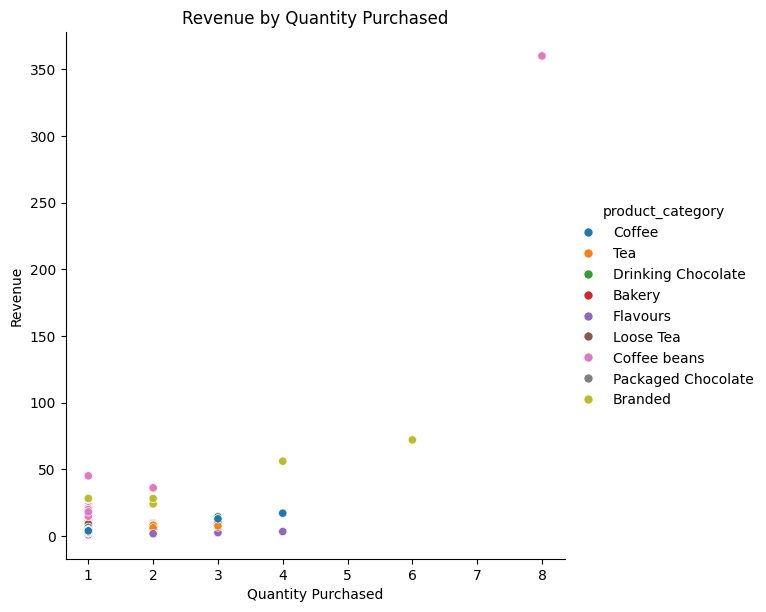

In [65]:
# Assuming 'transaction_revenue' is calculated as transaction_qty * unit_price in the dataset
sns.relplot(x='transaction_qty', y='transaction_revenue', data=data, kind='scatter', hue='product_category', height=6)
plt.title('Revenue by Quantity Purchased')
plt.xlabel('Quantity Purchased')
plt.ylabel('Revenue')
plt.show()

### Time Series Revenue by Date

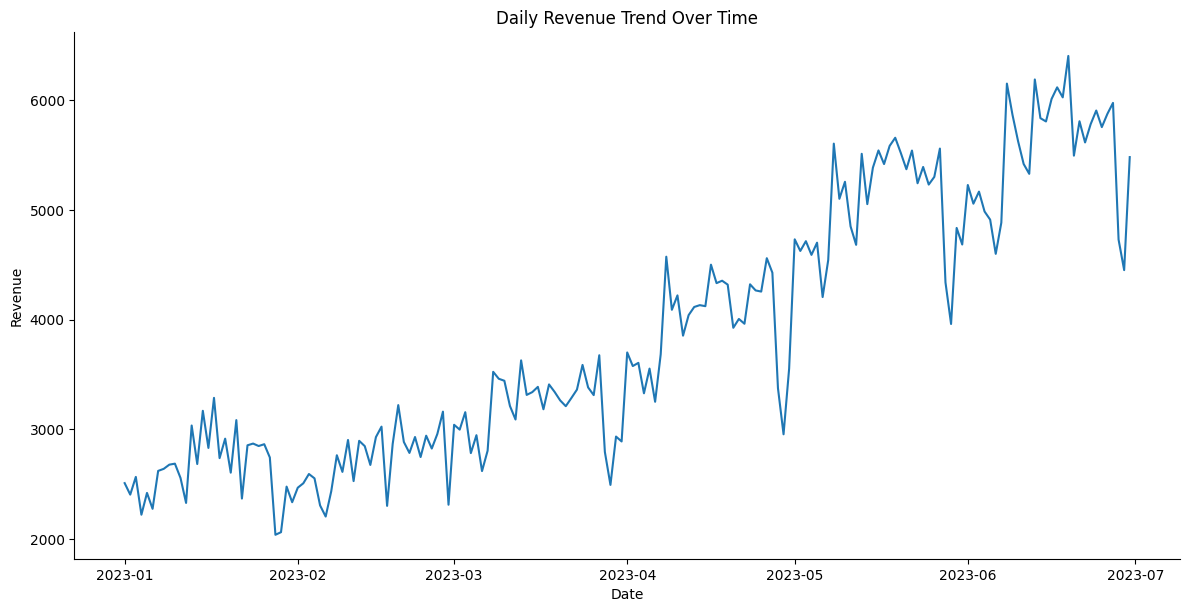

In [66]:
# Daily revenue
daily_revenue = data.groupby('transaction_date')['transaction_revenue'].sum().reset_index()

sns.relplot(x='transaction_date', y='transaction_revenue', data=daily_revenue, kind='line', height=6, aspect=2)
plt.title('Daily Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

# Distribution Plot (displot)

### Distribution of Revenue per Transaction

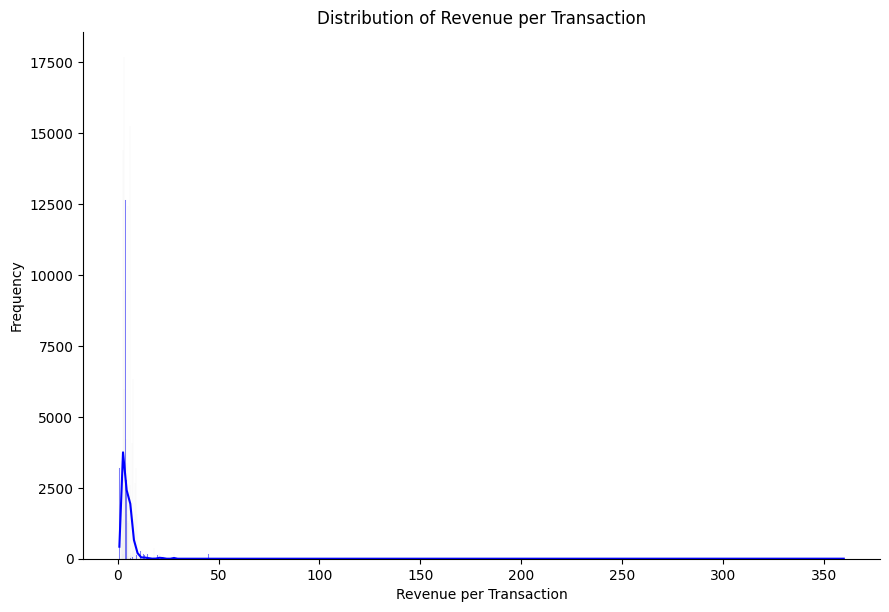

In [67]:
sns.displot(data, x='transaction_revenue', kde=True, height=6, aspect=1.5, color='blue')
plt.title('Distribution of Revenue per Transaction')
plt.xlabel('Revenue per Transaction')
plt.ylabel('Frequency')
plt.show()

###  Distribution of Unit Prices by Product Category

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19104\838811620.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data, x='unit_price', hue='product_category', kind='kde', height=6, aspect=1.5, fill=True)


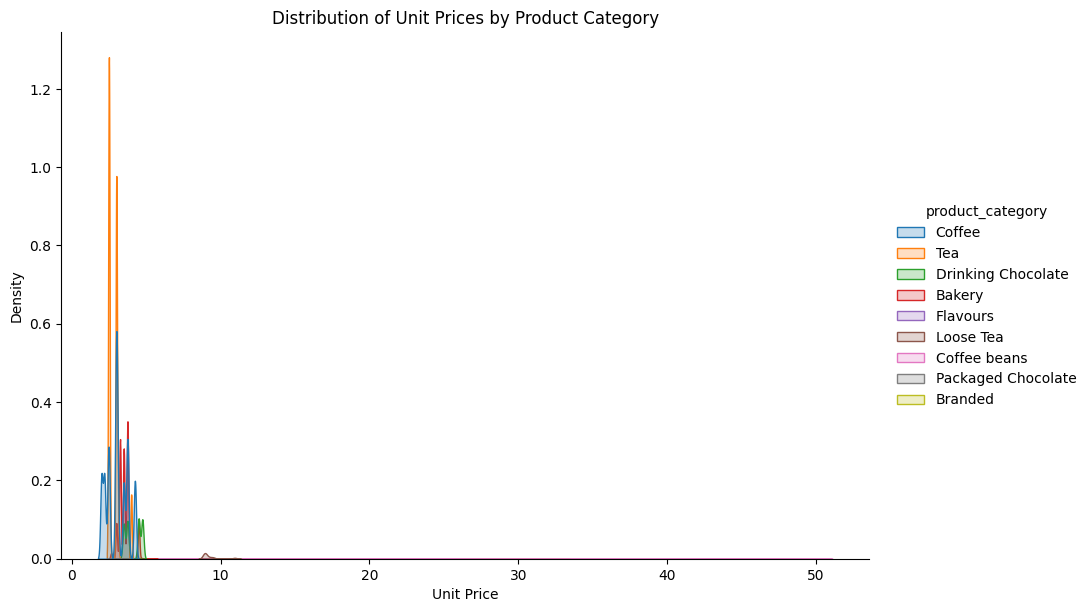

In [68]:
sns.displot(data, x='unit_price', hue='product_category', kind='kde', height=6, aspect=1.5, fill=True)
plt.title('Distribution of Unit Prices by Product Category')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.show()

# Categorical Plot (catplot)

### Average Revenue per Product Category

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19104\44391049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='product_category', y='transaction_revenue', data=avg_revenue_by_category, kind='bar', height=6, aspect=2, palette="viridis")


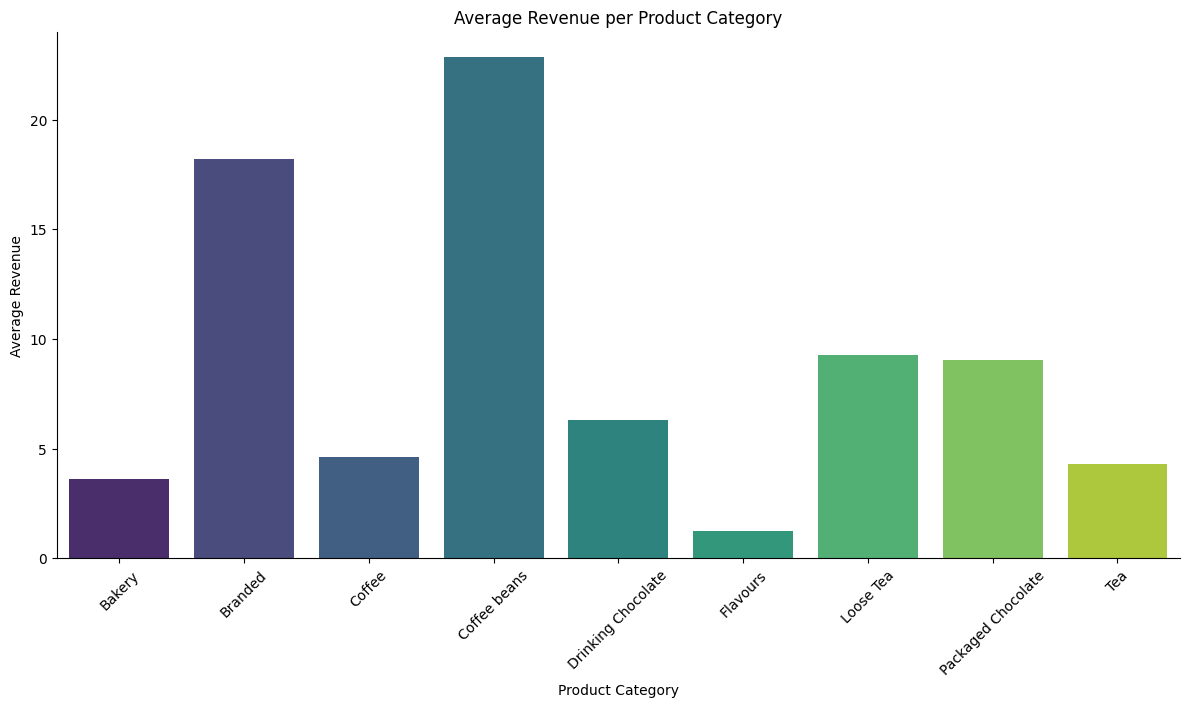

In [69]:
# Calculating average revenue by product category
avg_revenue_by_category = data.groupby('product_category')['transaction_revenue'].mean().reset_index()

sns.catplot(x='product_category', y='transaction_revenue', data=avg_revenue_by_category, kind='bar', height=6, aspect=2, palette="viridis")
plt.title('Average Revenue per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

### Quantity Purchased by Store Location

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19104\3470674599.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='store_location', y='transaction_qty', data=data, kind='box', height=6, aspect=1.5, palette="coolwarm")


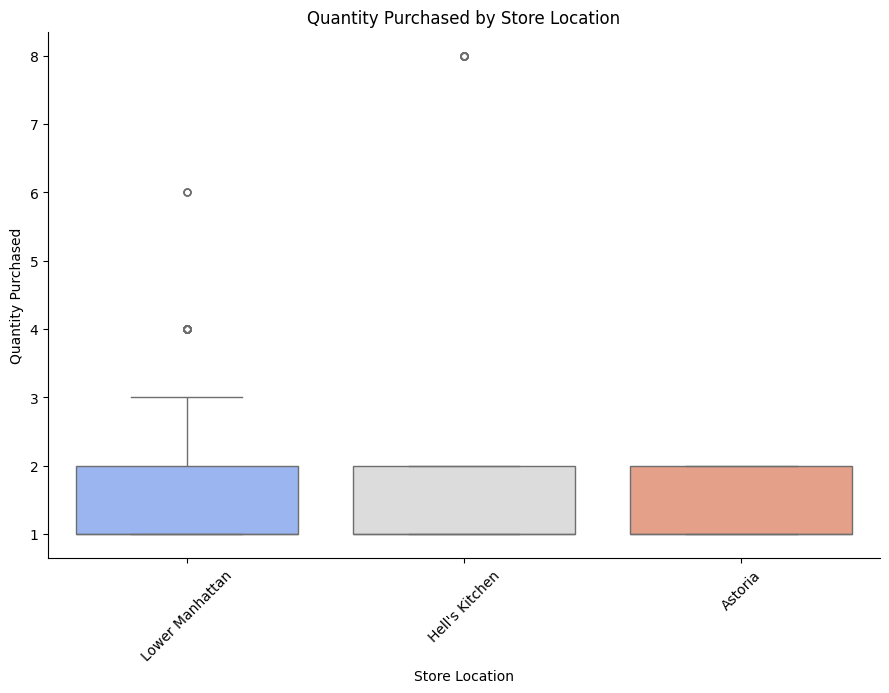

In [70]:
sns.catplot(x='store_location', y='transaction_qty', data=data, kind='box', height=6, aspect=1.5, palette="coolwarm")
plt.title('Quantity Purchased by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Quantity Purchased')
plt.xticks(rotation=45)
plt.show()